In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import the breast cancer dataset from sklearn and print the type

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [ ]:
# A bunch objects lets us check the keys to see what we can access
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# data.data is the input data
data.data.shape
# 569 samples, 30 features

(569, 30)

In [ ]:
# Let's check out the 'targets'
data.target
# Targets are just 0s and 1s
# Normally when you have K targets thay are labelled 0...K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# There are 569 corresponding targets
data.target.shape

(569,)

In [ ]:
# Look at the feature names we have to work with
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Time to train test split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Time for the PyTorch

# Let's build a model!
model = nn.Sequential(
  nn.Linear(D,1),
  nn.Sigmoid()
)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # Zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():.4f}')

Epoch 50/1000, Train Loss: 0.4762, Test Loss: 0.4762
Epoch 100/1000, Train Loss: 0.3614, Test Loss: 0.3614
Epoch 150/1000, Train Loss: 0.2934, Test Loss: 0.2934
Epoch 200/1000, Train Loss: 0.2482, Test Loss: 0.2482
Epoch 250/1000, Train Loss: 0.2165, Test Loss: 0.2165
Epoch 300/1000, Train Loss: 0.1933, Test Loss: 0.1933
Epoch 350/1000, Train Loss: 0.1758, Test Loss: 0.1758
Epoch 400/1000, Train Loss: 0.1620, Test Loss: 0.1620
Epoch 450/1000, Train Loss: 0.1509, Test Loss: 0.1509
Epoch 500/1000, Train Loss: 0.1417, Test Loss: 0.1417
Epoch 550/1000, Train Loss: 0.1340, Test Loss: 0.1340
Epoch 600/1000, Train Loss: 0.1275, Test Loss: 0.1275
Epoch 650/1000, Train Loss: 0.1218, Test Loss: 0.1218
Epoch 700/1000, Train Loss: 0.1168, Test Loss: 0.1168
Epoch 750/1000, Train Loss: 0.1124, Test Loss: 0.1124
Epoch 800/1000, Train Loss: 0.1085, Test Loss: 0.1085
Epoch 850/1000, Train Loss: 0.1050, Test Loss: 0.1050
Epoch 900/1000, Train Loss: 0.1018, Test Loss: 0.1018
Epoch 950/1000, Train Loss: 0

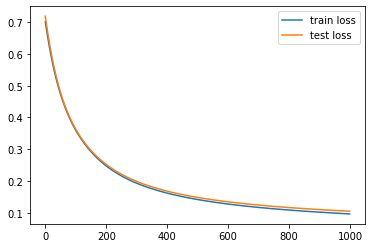

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9764, Test acc: 0.9840


# Save and Load Model

In [18]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4284, -0.5021, -0.3064, -0.2231, -0.2076, -0.3396, -0.3356, -0.4470,
                       -0.2016,  0.3014, -0.2772, -0.0856, -0.2872, -0.5422, -0.0702,  0.1534,
                        0.1144, -0.1674,  0.2127,  0.4411, -0.4210, -0.4930, -0.5036, -0.5324,
                       -0.2274, -0.1341, -0.2039, -0.2909, -0.2243, -0.2485]])),
             ('0.bias', tensor([0.4716]))])

In [19]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [20]:
!ls

mymodel.pt  sample_data


In [21]:
# Load the model
# Note: This makes more sense and is more compact when the model is a big class
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [22]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9764, Test acc: 0.9840


In [23]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>